In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys

In [19]:
print("Welcome to ozFinance")

num_of_options = 0
num_of_stocks = 0
spot_price_of_stock = 0
total_action_of_stocks = 0



Welcome to ozFinance


In [20]:
def validate_action(act):
 if act != "buy" and act != "sell" and act != "Sell" and act != "SELL":
    print("Input Error")
    sys.exit()
def validate_type(type):
 if type != "call" and type != "Call" and type != "put" and type != "Put" and type != "put(P)" and type != "Put(P)" and type != "call(C)"and type != "Call(C)":
    print("Type Error")
    sys.exit()

def is_there_arbitrage(spot_price_of_stock,option_type,option_strike,option_prem):
  
  if (option_type in[ "call" or "Call" or "call(C)" or "Call(C)"] and spot_price_of_stock > option_strike):
    
    if option_prem < (spot_price_of_stock-option_strike):
      return True
    
  if(option_type in["put" or "put" or "put(P)" or "put(P)"] and  spot_price_of_stock < option_strike):

    if option_prem < (option_strike-spot_price_of_stock):
      return True

  return False    
   
      
    



In [21]:
num_of_options = int(input("How many options are you going to use? "))
num_of_stocks = int(input("How many stocks are you going to use? "))
spot_price_of_stock = float(input("Stock's spot price: "))

stocks = []

for i in range(num_of_stocks):

    stock = {}
    stock["Action"] = input("Hisse Senedi Alim/Satim {}:".format(i+1))
    validate_action(stock["Action"] )
    stocks.append(stock)

    

print("How many options are you going to use?:",num_of_options)
print("How many stocks are you going to use?:",num_of_stocks)
print("Stock's spot price:",spot_price_of_stock)
print()

print('\033[4m' + 'Stock Information' + '\033[0m')

for i,stock in enumerate(stocks):
    print("Stock",str(i+1),"Buy/Sell: {}".format(stock["Action"]))
  
    if stock["Action"] in ['buy', 'Buy', 'BUY']:
        total_action_of_stocks += 1
    else:
        total_action_of_stocks -= 1
print()

if(total_action_of_stocks >= 0):
    print('\033[1m' +"Final Action:"+ '\033[0m',str(total_action_of_stocks),"buy" )
if(total_action_of_stocks < 0):
    print('\033[1m' +"Final Action:"+ '\033[0m',str(abs(total_action_of_stocks)),"sell" )
        

print()


options = []

for i in range(num_of_options):

    option = {}
    option["Type"] = input("Option Type{}: ".format(i+1))
    validate_type(option["Type"])
    option["Action"] = input("Buy/Sell {}: ".format(i+1))
    validate_action(option["Action"] )
    option["Strike Price"] = float(input("Strike Price: {} ".format(i+1)))
    option["Premium"] = float(input("Option Price{} : ".format(i+1)))

    options.append(option)


for i, option in enumerate(options):
    print('\033[4m' + 'Option', str(i+1) ,'Information'+ '\033[0m')
    print("Action: {}\nBuy/Sell: {}\nStrike Price: {}\nOption Price: {}\n".format(option["Type"], option["Action"], option["Strike Price"], option["Premium"]))


for i, option in enumerate(options):
    
    if is_there_arbitrage(spot_price_of_stock,option["Type"],option["Strike Price"],option["Premium"]):
        print('\033[1m' + "ATTENTION!" + '\033[0m',"For Option",str(i+1),"there is an arbitrage situation worth",str(abs(spot_price_of_stock-option["Strike Price"])-option["Premium"]))




How many options are you going to use?: 2
How many stocks are you going to use?: 0
Stock's spot price: 100.0

Stock Information

Final Action: 0 buy

Option 1 Information
Action: call
Buy/Sell: buy
Strike Price: 90.0
Option Price: 8.0

Option 2 Information
Action: put
Buy/Sell: buy
Strike Price: 110.0
Option Price: 5.0

ATTENTION! For Option 1 there is an arbitrage situation worth 2.0
ATTENTION! For Option 2 there is an arbitrage situation worth 5.0


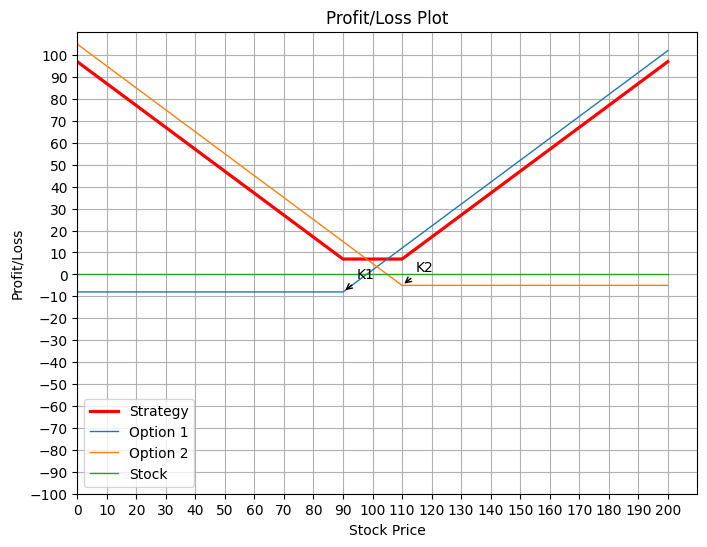

In [22]:
interval_percentage = 0.2  
interval = int(spot_price_of_stock * interval_percentage*(0.5))
interval2 = int(spot_price_of_stock * interval_percentage*(0.5))


stock_price_range = np.arange(0, spot_price_of_stock * 2 + interval, interval) 

strategy_profit = np.zeros_like(stock_price_range)


for i in range(0,abs(total_action_of_stocks)):

    if total_action_of_stocks > 0:
        stock_profit =  (stock_price_range - spot_price_of_stock)
    else:
        stock_profit = -(stock_price_range - spot_price_of_stock)
        
    strategy_profit += stock_profit


for option in options:
    option_profit = np.zeros_like(stock_price_range)

    if option["Type"].upper() in["CALL","call","Call"]:
       option_profit = np.where(stock_price_range > option["Strike Price"], stock_price_range - option["Strike Price"], 0)
    elif option["Type"].upper() in["PUT","put","Put"]:
        option_profit = np.where(stock_price_range < option["Strike Price"], option["Strike Price"] - stock_price_range, 0)

    option_profit -= option["Premium"]
    if option["Action"].upper() in["SELL","Sell","sell"]:
        option_profit *= -1

    strategy_profit += option_profit


plt.figure(figsize=(8, 6))
plt.plot(stock_price_range, strategy_profit, 'r', label='Strategy',linewidth=2.3)

for i, option in enumerate(options):
    option_profit = np.zeros_like(stock_price_range)

    if option["Type"].upper() in ["CALL","call","Call","PUT","put","Put"]:
        if option["Type"].upper() in["CALL","call","Call"]:
            option_profit = np.maximum(stock_price_range - option["Strike Price"], 0) - option["Premium"]
        elif option["Type"].upper() in["PUT","put","Put"]:
            option_profit = np.maximum(option["Strike Price"] - stock_price_range, 0) - option["Premium"]

       

        if option["Action"].upper()  in["SELL","Sell","sell"]:
            option_profit *= -1
            

        plt.plot(stock_price_range, option_profit, label='Option {}'.format(i + 1), linewidth=1.0)
        strike_price_label = 'K{}'.format(i + 1)
        strike_price_index = np.argmin(np.abs(stock_price_range - option["Strike Price"]))
        plt.annotate(strike_price_label, xy=(stock_price_range[strike_price_index], option_profit[strike_price_index]),
                     xytext=(10, 10), textcoords='offset points', arrowprops=dict(arrowstyle="->"))
        
        if (total_action_of_stocks==0):
            y_axis_ticks = np.arange(-spot_price_of_stock, spot_price_of_stock+interval2, interval2)

        elif(total_action_of_stocks > 0):
            y_axis_ticks = np.arange(-spot_price_of_stock*total_action_of_stocks, spot_price_of_stock*total_action_of_stocks+interval2, interval2)
    
        else:
            y_axis_ticks = np.arange(-spot_price_of_stock-2*interval2, spot_price_of_stock+3*interval2, interval2)

        
stock_profit = total_action_of_stocks * (stock_price_range - spot_price_of_stock)
plt.plot(stock_price_range, stock_profit, label='Stock', linewidth=1.0)
plt.xlabel('Stock Price')
plt.ylabel('Profit/Loss')
plt.title('Profit/Loss Plot')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, spot_price_of_stock * 2 + interval, interval))
plt.yticks(y_axis_ticks)
plt.xlim(left=0)
plt.show()
